In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

sns.set_style()

# Exploracion de datos

In [2]:
train_dir = "data/Train.xlsx"

data = pd.read_excel(train_dir)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,240000,2,2,2,37,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
1,240000,2,3,1,43,0,0,0,0,0,...,65130,66494,67441,2300,2400,2329,2411,2050,2000,0
2,40000,2,1,2,24,0,0,0,0,0,...,37263,35224,34111,5000,8017,7000,4000,5000,5000,1
3,360000,1,1,2,29,-2,-2,-2,-2,-2,...,3466,1630,2931,2358,3788,3483,1638,2946,16950,0
4,130000,1,1,2,27,0,0,0,0,0,...,35194,35951,36703,1867,1872,1256,1500,1500,1500,0


In [3]:
data.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [4]:
data = data.rename(columns={"default.payment.next.month":"default", "PAY_0":"PAY_1"})

In [5]:
gr = data.groupby("default")[["LIMIT_BAL"]].count()
gr["pct"] = gr["LIMIT_BAL"]/gr["LIMIT_BAL"].sum()
gr

,LIMIT_BAL,pct
default,,
0,18690,0.778782
1,5309,0.221218


Las clases no estan desbalanceadas

In [6]:
XTrain, XTest, yTrain, yTest = train_test_split(data.drop(columns="default"), data["default"], test_size=0.2, random_state=7)

In [7]:
data_train = pd.concat([XTrain,yTrain],axis=1)
gr = data_train.groupby("default")[["LIMIT_BAL"]].count()
gr["pct"] = gr["LIMIT_BAL"]/gr["LIMIT_BAL"].sum()
gr

,LIMIT_BAL,pct
default,,
0,14978,0.780145
1,4221,0.219855


In [8]:
var_categ = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

var_cont = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

data_train[var_cont].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,19199.000000,19199.000000,19199.000000,19199.000000,1.919900e+04,19199.000000,19199.000000,19199.000000,19199.000000,1.919900e+04,19199.000000,19199.000000,19199.000000,19199.000000
mean,167264.424189,35.484348,51039.577322,49032.712329,4.697210e+04,43227.804521,40361.107141,39000.315173,5620.931299,5.956795e+03,5219.914110,4914.133184,4849.605917,5114.730923
std,129732.975552,9.197402,73530.921163,71027.002951,6.982228e+04,64343.973659,60694.859580,59465.813171,16639.820942,2.413026e+04,17755.914586,16280.270269,15692.645031,17024.830375
min,10000.000000,21.000000,-154973.000000,-69777.000000,-6.150600e+04,-81334.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3516.000000,2910.000000,2.642000e+03,2311.500000,1721.500000,1239.500000,1000.000000,8.270000e+02,390.000000,300.000000,240.500000,148.000000
50%,140000.000000,34.000000,22291.000000,21127.000000,2.005700e+04,19048.000000,18135.000000,17124.000000,2102.000000,2.011000e+03,1781.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.500000,66972.500000,64244.000000,6.034900e+04,54446.500000,50481.000000,49563.000000,5000.000000,5.000000e+03,4497.500000,4007.000000,4030.000000,4000.000000
max,800000.000000,79.000000,746814.000000,743970.000000,1.664089e+06,706864.000000,823540.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,443001.000000


#### Graficas descriptivas

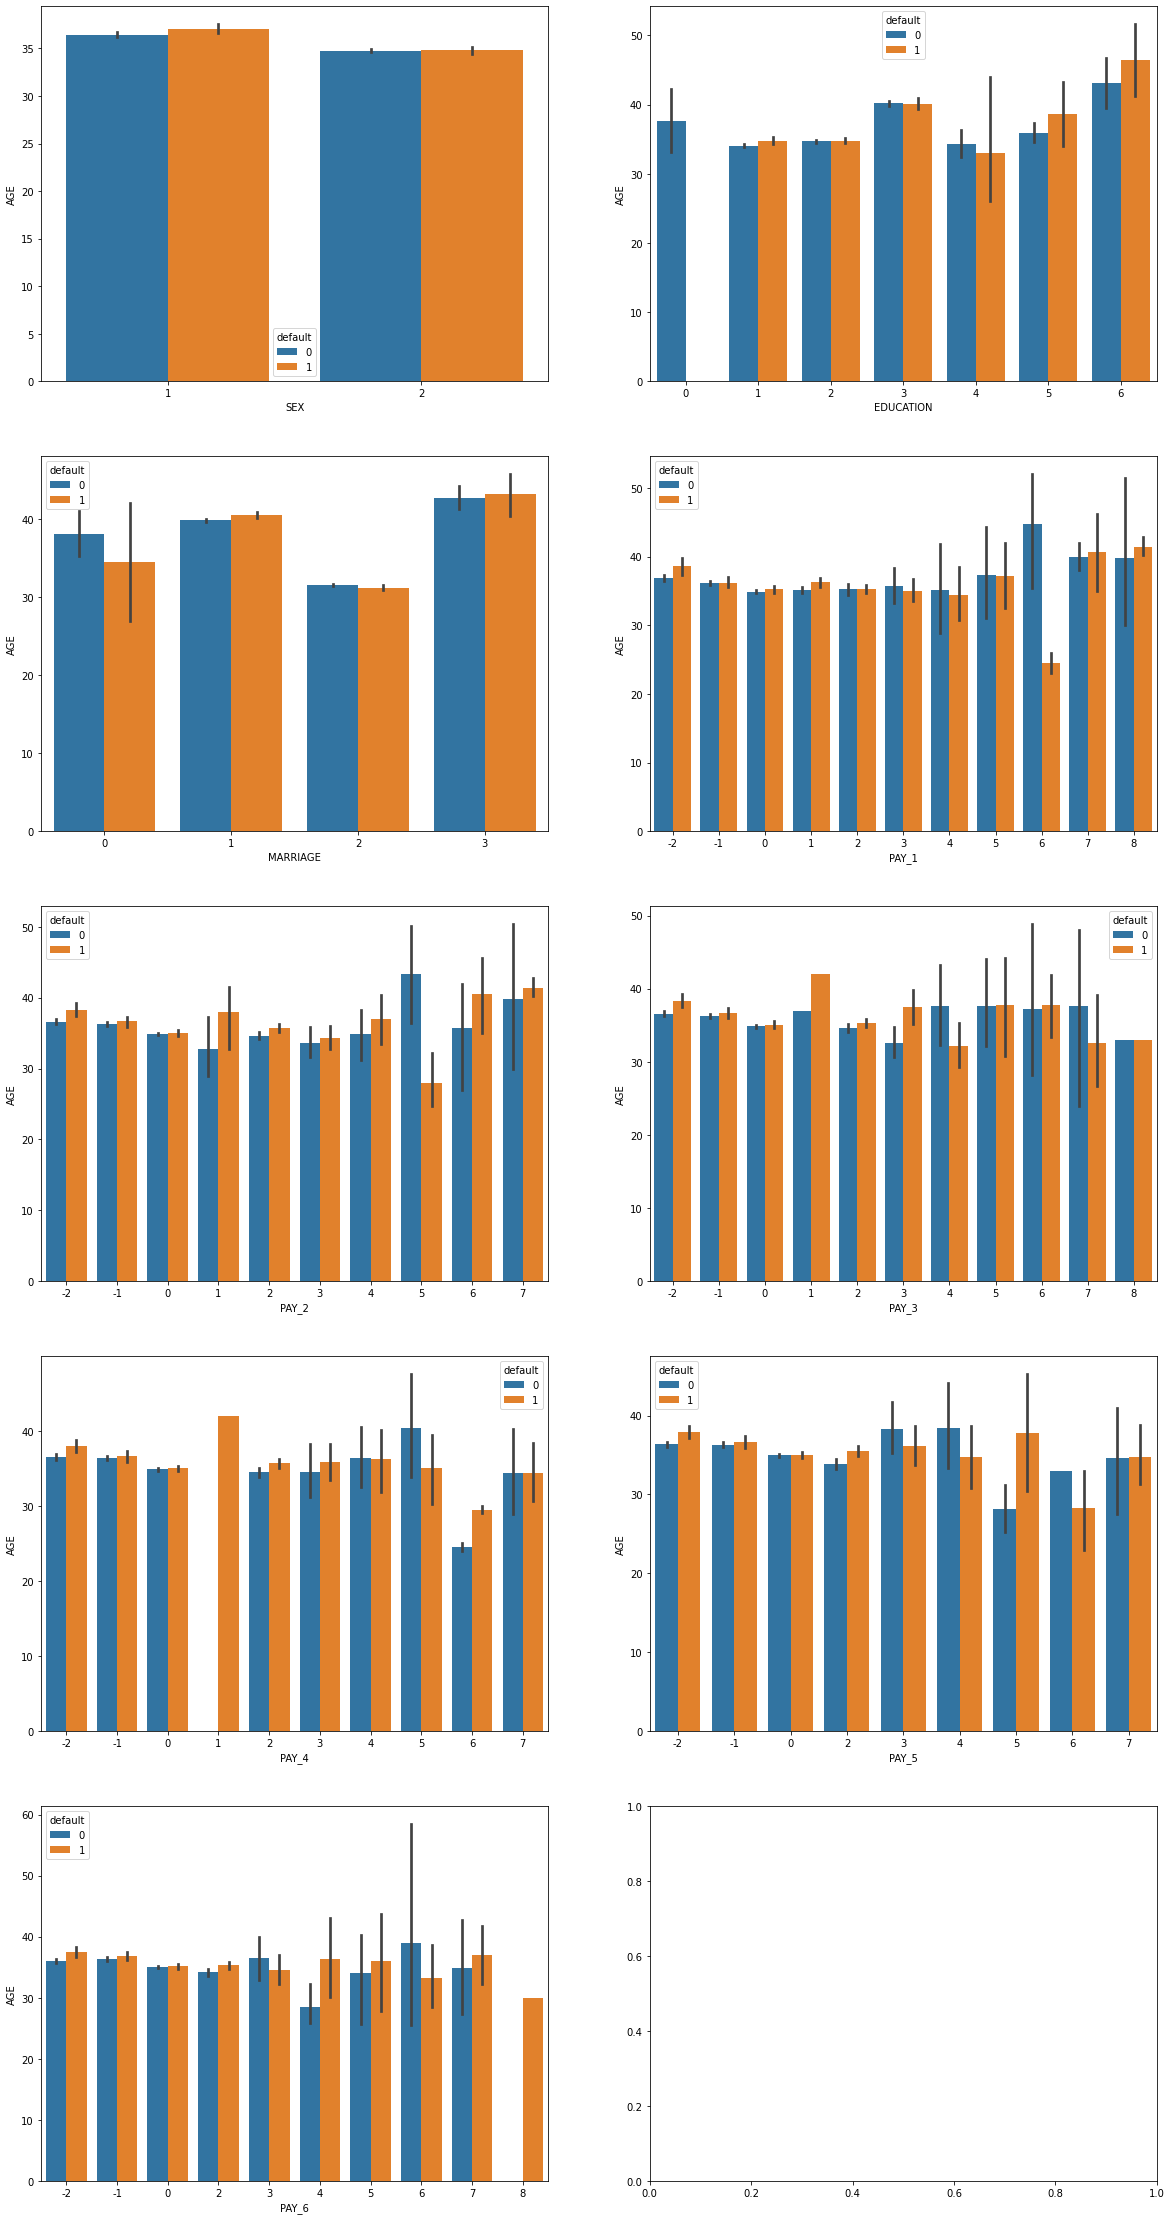

In [9]:
# Grafico 

ncols = 2 
nrows = int(np.ceil(len(data_train[var_categ].columns.values)/ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 40))
axs = ax.flatten()

for i,c in enumerate(var_categ):

    sns.barplot(data=data_train, x=c, y="AGE", hue="default", ax = axs[i])
    #axs[i].set_title("grafica variable: {}".format(c))

Categorias que no estan documentadas, hay que determinar que hacer con dichos casos

In [10]:
data_train[var_cont].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,19199.000000,19199.000000,19199.000000,19199.000000,1.919900e+04,19199.000000,19199.000000,19199.000000,19199.000000,1.919900e+04,19199.000000,19199.000000,19199.000000,19199.000000
mean,167264.424189,35.484348,51039.577322,49032.712329,4.697210e+04,43227.804521,40361.107141,39000.315173,5620.931299,5.956795e+03,5219.914110,4914.133184,4849.605917,5114.730923
std,129732.975552,9.197402,73530.921163,71027.002951,6.982228e+04,64343.973659,60694.859580,59465.813171,16639.820942,2.413026e+04,17755.914586,16280.270269,15692.645031,17024.830375
min,10000.000000,21.000000,-154973.000000,-69777.000000,-6.150600e+04,-81334.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3516.000000,2910.000000,2.642000e+03,2311.500000,1721.500000,1239.500000,1000.000000,8.270000e+02,390.000000,300.000000,240.500000,148.000000
50%,140000.000000,34.000000,22291.000000,21127.000000,2.005700e+04,19048.000000,18135.000000,17124.000000,2102.000000,2.011000e+03,1781.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.500000,66972.500000,64244.000000,6.034900e+04,54446.500000,50481.000000,49563.000000,5000.000000,5.000000e+03,4497.500000,4007.000000,4030.000000,4000.000000
max,800000.000000,79.000000,746814.000000,743970.000000,1.664089e+06,706864.000000,823540.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,443001.000000


Cuando la variable BILL_AMT{n} tiene un valor negativo indica que la deuda tiene un saldo a favor, por lo que se puede interpretar que se pago mas de la cuenta.

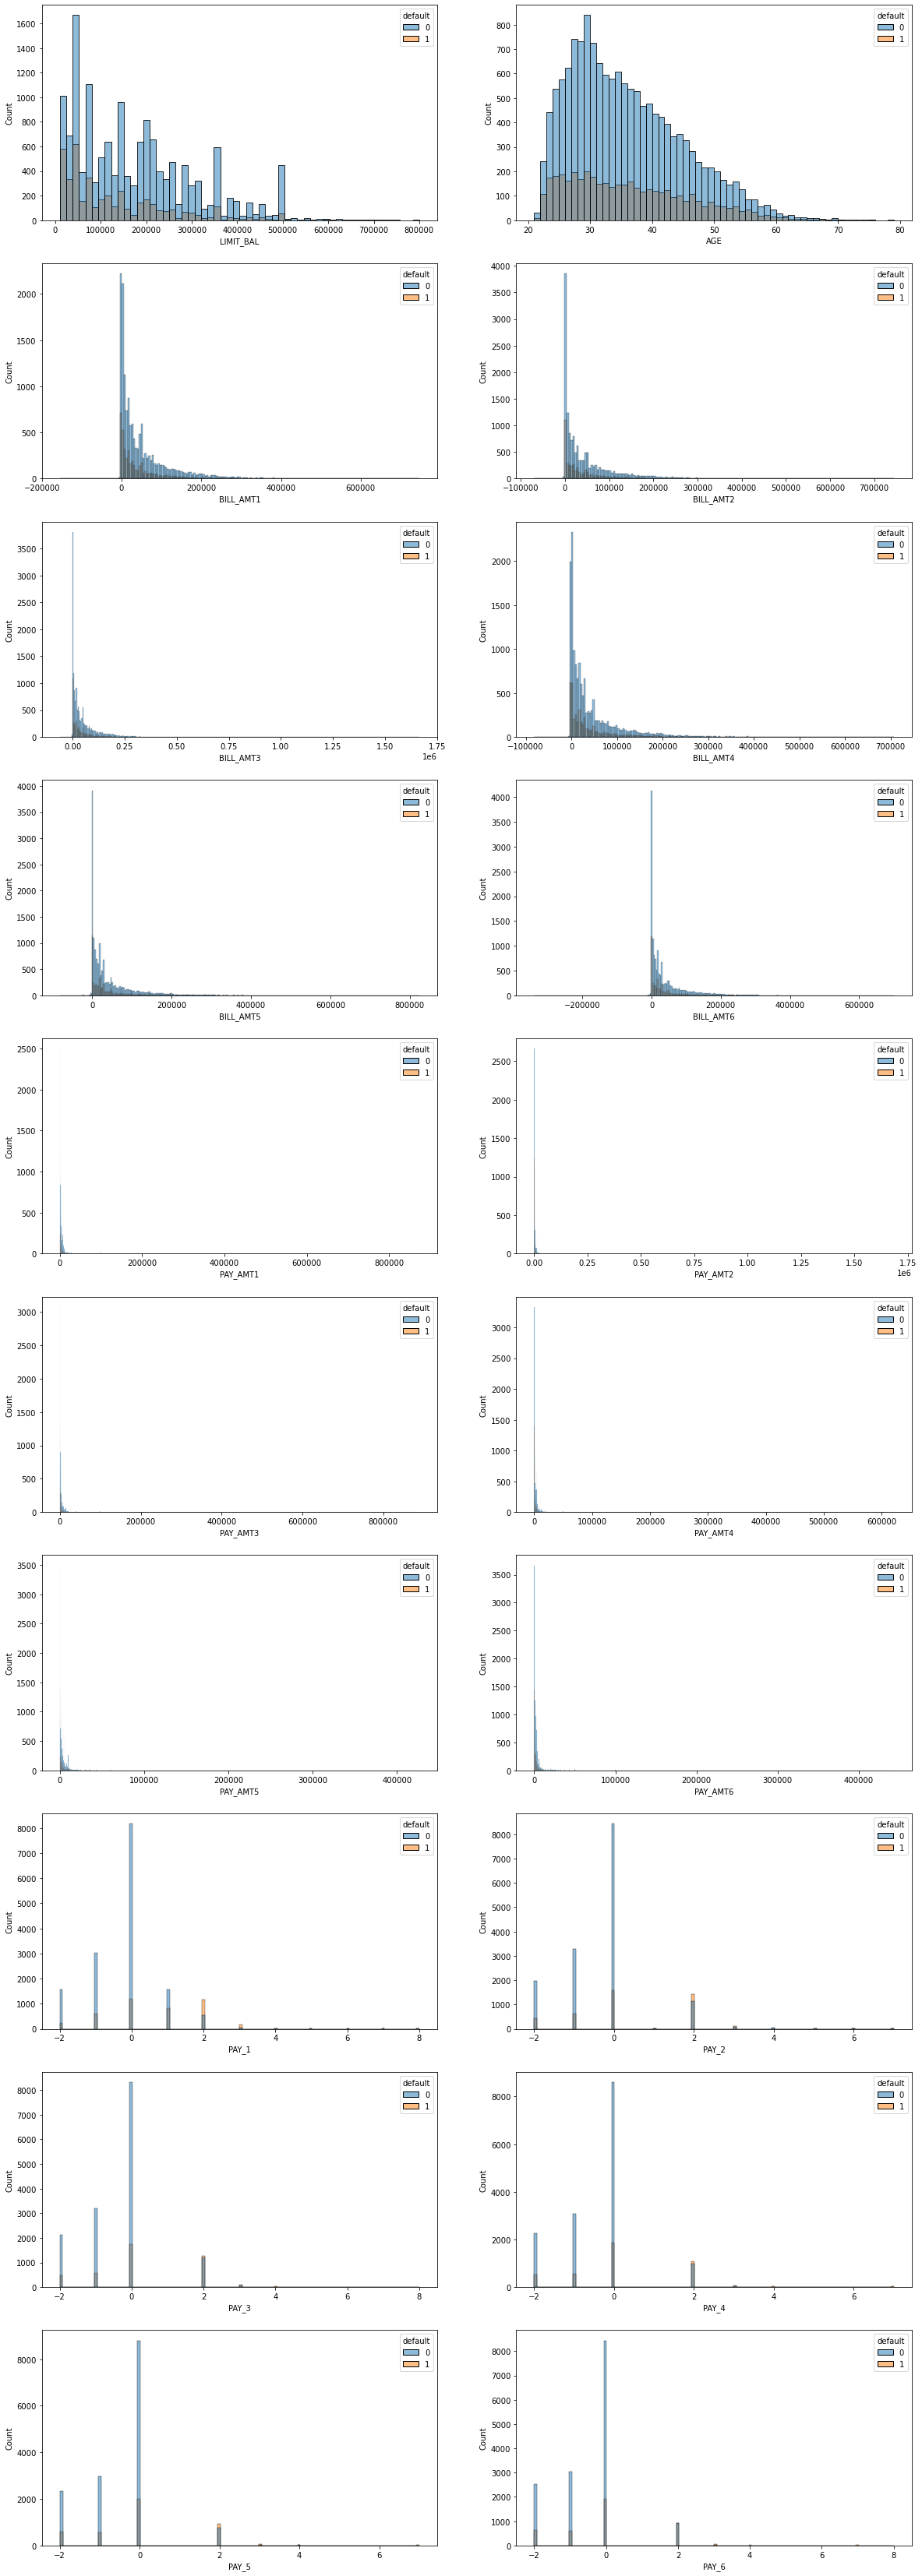

In [11]:
new_var_cont = var_cont + ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

ncols = 2 
nrows = int(np.ceil(len(data_train[new_var_cont].columns.values)/ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 60))
axs = ax.flatten()

for i,c in enumerate(new_var_cont):

    sns.histplot(data=data_train, x=c, hue="default", ax = axs[i])
    #sns.boxplot(data=data_train, y=c, x="default", ax = axs[i])

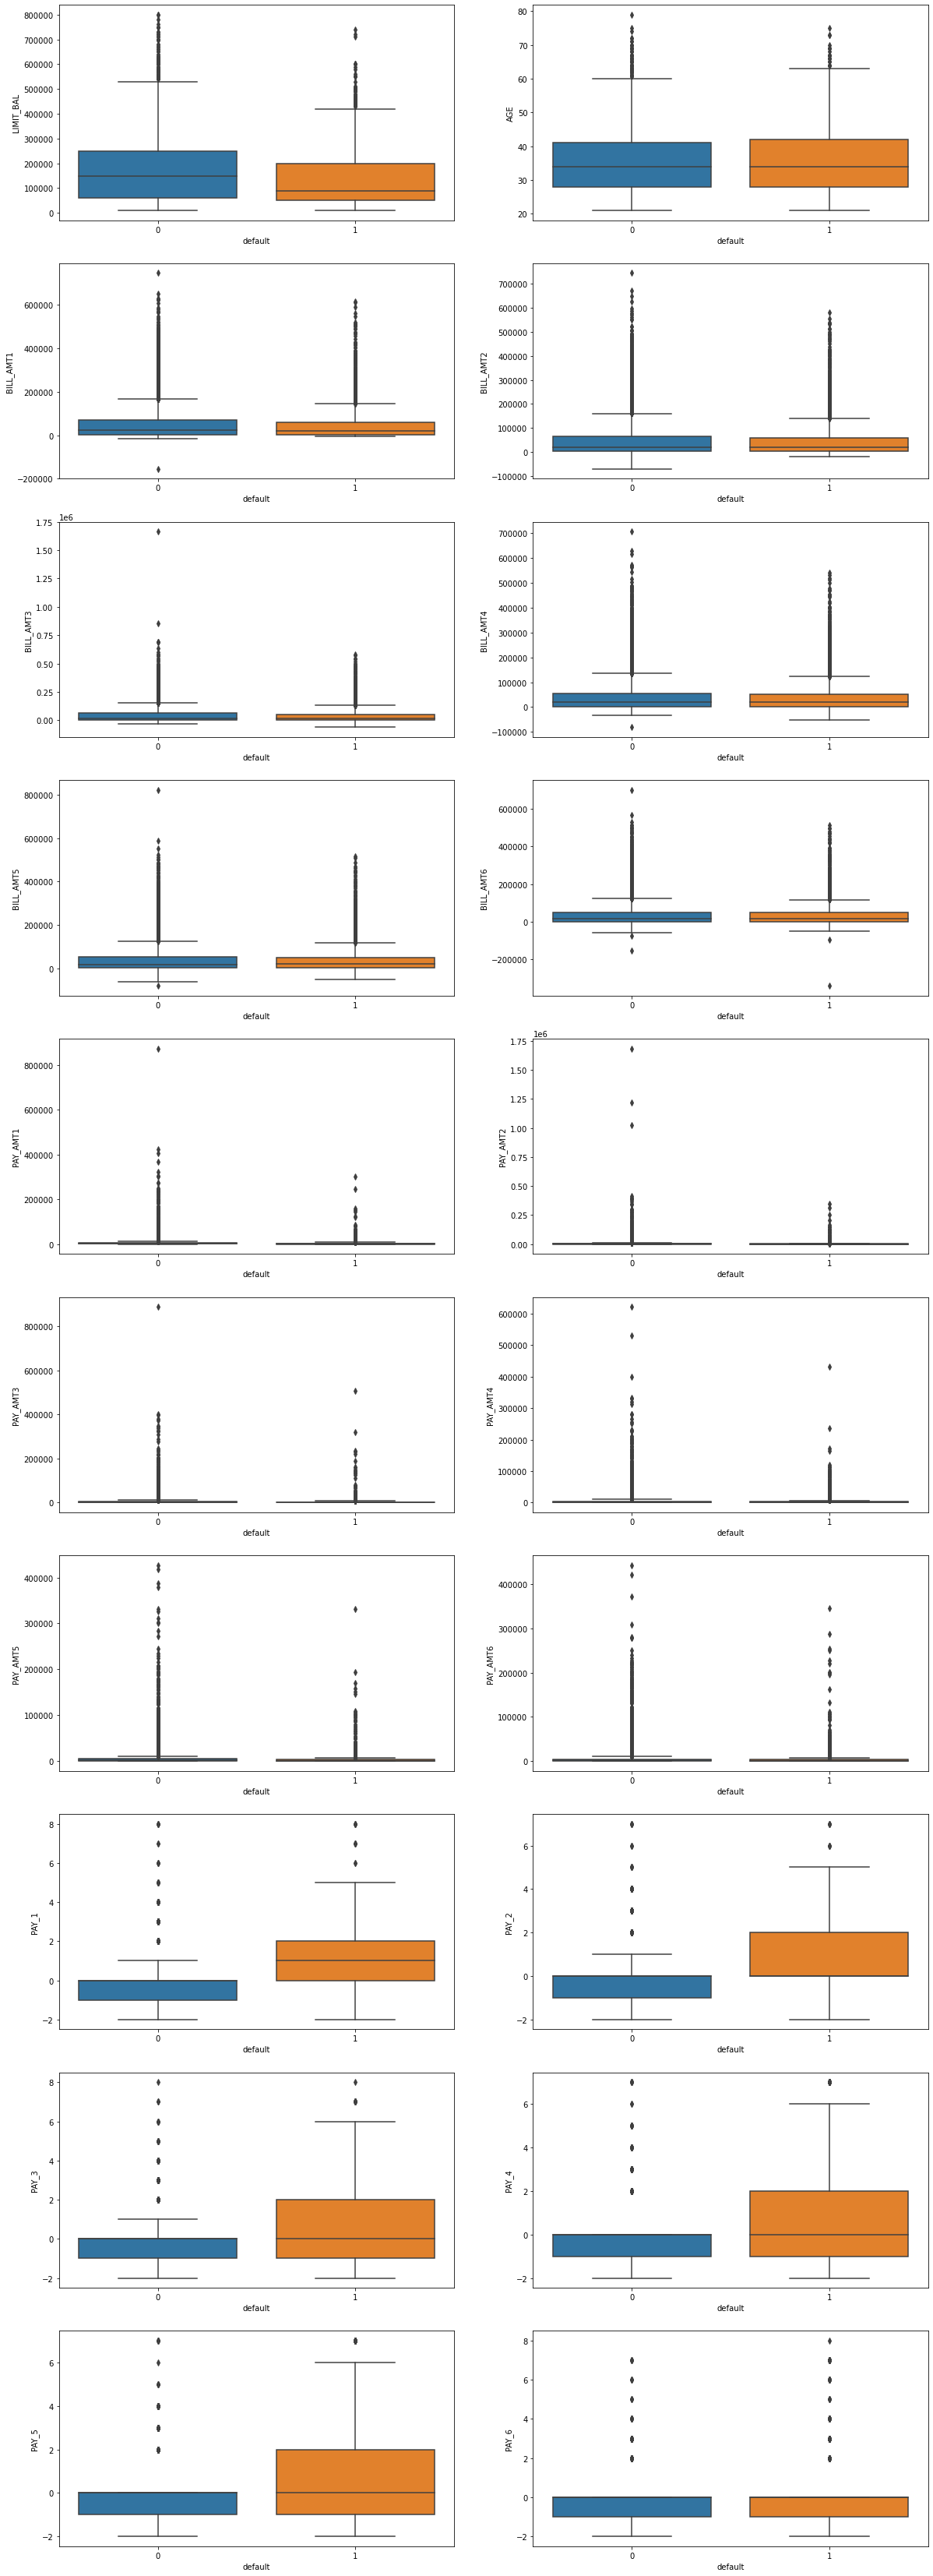

In [13]:
new_var_cont = var_cont + ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

ncols = 2 
nrows = int(np.ceil(len(data_train[new_var_cont].columns.values)/ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 60))
axs = ax.flatten()

for i,c in enumerate(new_var_cont):

    #sns.histplot(data=data_train, x=c, hue="default", ax = axs[i])
    sns.boxplot(data=data_train, y=c, x="default", ax = axs[i])

<AxesSubplot:>

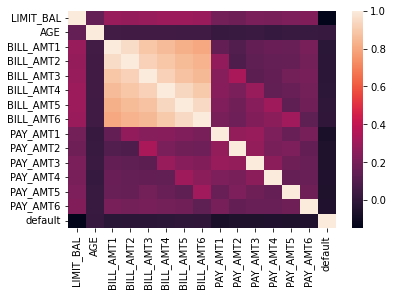

In [14]:
sns.heatmap(data_train[var_cont+["default"]].corr())

Existe alta correlacion entre las variables BILL_AMT{n}, esto puede ser debido a la consistencia en el comportamiento de un cliente por lo que el valor que paga un cliente en un mes quizas sea similar al valor que debe pagar en los meses posteriores o anteriores

# Transformacion de varaibles

Se transformará la variable de BILL_AMT{n} en dos variables una binaria que indica si el valor es negativo (saldo a favor) y otra que tendrá el valor del saldo a favor.

aplicar logaritmo a las variables que tienen skewness

In [15]:
def transform_x(X_in):
    
    for i in np.arange(1,6):
        X_in["DIFF_BILL_PAY_{i}".format(i=i)] = X_in["BILL_AMT{i}".format(i=i+1)] - X_in["PAY_AMT{i}".format(i=i)]
        #X_in["DIFF_BILL_PAY_{i}".format(i=i)] = np.log(X_in["DIFF_BILL_PAY_{i}".format(i=i)]+1)
        X_in["CHANGE_PAY_STATUS_{i}".format(i=i)] = X_in["PAY_{i}".format(i=i)] - X_in["PAY_{i}".format(i=i+1)]
    
    for i in np.arange(1,7):
        X_in["IS_REFUND{i}".format(i=i)] = (X_in["BILL_AMT{i}".format(i = i)] < 0).astype(int)
        X_in["REFUND_AMT{i}".format(i=i)] = X_in["BILL_AMT{i}".format(i=i)].apply(lambda x : x*-1 if x < 0 else 0)
        X_in["IS_BILLED{i}".format(i=i)] = (X_in["BILL_AMT{i}".format(i = i)] != 0).astype(int)
        
        X_in["POS_BILL_AMT{i}".format(i=i)] = X_in["BILL_AMT{i}".format(i=i)].apply(lambda x : x if x > 0 else 0)
        X_in = X_in.drop(columns="BILL_AMT{i}".format(i=i))

        X_in["DEFAULT_ON_{i}".format(i=i)] = (X_in["PAY_{i}".format(i=i)] > 0).astype(int)


    X_in["PROPORTION_BILL_LIMIT"] = X_in["POS_BILL_AMT1"] / X_in["LIMIT_BAL"]
    X_in["PROPORTION_BILL_PAYED"] = X_in["PAY_AMT1"] / (X_in["POS_BILL_AMT2"]+1)
    
    

    # logaritmo
    X_in["LIMIT_BAL"] = np.log(X_in["LIMIT_BAL"] + 1)
    X_in["AGE"] = np.log(X_in["AGE"] + 1)    
    X_in["PROPORTION_BILL_LIMIT"] = np.log(X_in["PROPORTION_BILL_LIMIT"] + 1)
    X_in["PROPORTION_BILL_PAYED"] = np.log(X_in["PROPORTION_BILL_PAYED"] + 1)

    for i in np.arange(1,7):
        X_in["REFUND_AMT{i}".format(i=i)] = np.log(X_in["REFUND_AMT{i}".format(i=i)] + 1)
        X_in["POS_BILL_AMT{i}".format(i=i)] = np.log(X_in["POS_BILL_AMT{i}".format(i=i)] + 1)
        X_in["PAY_AMT{i}".format(i = i)] = np.log(X_in["PAY_AMT{i}".format(i = i)] + 1)

    # feature engineering

    X_in["CONSECUTIVE_DEFAULTS"] = X_in[["DEFAULT_ON_{i}".format(i=x) for x in np.arange(2,7)]].sum(axis=1)

    X_in["MEAN_BILL_AMT"] = X_in[["POS_BILL_AMT{i}".format(i=x) for x in np.arange(2,7)]].mean(axis=1)
    
    c = X_in["MEAN_BILL_AMT"] != 0
    X_in["TREND_BILL_AMT"] = 0
    X_in.loc[c,"TREND_BILL_AMT"] = (X_in.loc[c,"POS_BILL_AMT1"]/X_in.loc[c,"MEAN_BILL_AMT"])

    X_in["TREND_BILL_AMT"] = np.log(X_in["TREND_BILL_AMT"] + 1)
    
    X_in["MEAN_PAY_AMT"] = X_in[["PAY_AMT{i}".format(i=x) for x in np.arange(2,7)]].mean(axis=1)
    c = X_in["MEAN_PAY_AMT"] != 0
    X_in["TREND_PAY_AMT"] = 0
    X_in.loc[c,"TREND_PAY_AMT"] = X_in.loc[c,"PAY_AMT1"]/X_in.loc[c,"MEAN_PAY_AMT"]

    X_in["TREND_PAY_AMT"] = np.log(X_in["TREND_PAY_AMT"] + 1)

    #X_in = X_in.drop(columns=["MEAN_BILL_AMT","MEAN_PAY_AMT"])  

    c = X_in["EDUCATION"].isin([0,5,6])
    X_in.loc[c,"EDUCATION"] = 0


    
    

    # #dummies 
    # col_dummies = ['MARRIAGE','EDUCATION','SEX'] + ["PAY_{i}".format(i=x) for x in np.arange(1,7)]

    # for i in col_dummies:
    #     X_in = pd.concat([X_in,pd.get_dummies(X_in[i], prefix="{val}_".format(val=i), drop_first=True)], axis=1)
    #     X_in = X_in.drop(columns=i)

    return X_in

XTrain_transform = transform_x(XTrain)
XTest_transform = transform_x(XTest)

In [16]:
from sklearn.preprocessing import OneHotEncoder

# get dummies
col_dummies = ['MARRIAGE','EDUCATION','SEX'] + ["PAY_{i}".format(i=x) for x in np.arange(1,7)]

encoder = OneHotEncoder(drop='first',handle_unknown='ignore',
                        categories=[[0, 1, 2, 3],
                                    [0, 1, 2, 3, 4],
                                    [1, 2],
                                    [-2, -1,  0,  1,  2,  3,  4,  5,  6,  7, 8],
                                    [-2, -1,  0,  1,  2,  3,  4,  5,  6,  7, 8],
                                    [-2, -1,  0,  1,  2,  3,  4,  5,  6,  7, 8],
                                    [-2, -1,  0,  1,  2,  3,  4,  5,  6,  7, 8],
                                    [-2, -1,  0,  1,  2,  3,  4,  5,  6,  7, 8],
                                    [-2, -1,  0,  1,  2,  3,  4,  5,  6,  7, 8]])

encoder.fit(XTrain_transform[col_dummies])

XTrain_transform = pd.concat([XTrain_transform,pd.DataFrame(encoder.transform(XTrain_transform[col_dummies]).toarray(), columns = encoder.get_feature_names_out(), index = XTrain_transform.index)], axis = 1)
#XTrain_transform = XTrain_transform.drop(columns=col_dummies)
XTest_transform = pd.concat([XTest_transform,pd.DataFrame(encoder.transform(XTest_transform[col_dummies]).toarray(), columns = encoder.get_feature_names_out(), index = XTest_transform.index)], axis = 1)
#XTest_transform = XTest_transform.drop(columns=col_dummies)

In [ ]:
data_train = pd.concat([XTrain_transform,yTrain],axis=1)

var_cont = ['LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
            'REFUND_AMT1','POS_BILL_AMT1','REFUND_AMT2', 'POS_BILL_AMT2',
            'REFUND_AMT3', 'POS_BILL_AMT3', 'REFUND_AMT4', 'POS_BILL_AMT4',
            'REFUND_AMT5', 'POS_BILL_AMT5', 'REFUND_AMT6', 'POS_BILL_AMT6', 'TREND_BILL_AMT', 'TREND_PAY_AMT',
            'PROPORTION_BILL_LIMIT', 'CONSECUTIVE_DEFAULTS','DIFF_BILL_PAY_1', 'CHANGE_PAY_STATUS_1', 'DIFF_BILL_PAY_2',
            'CHANGE_PAY_STATUS_2', 'DIFF_BILL_PAY_3', 'CHANGE_PAY_STATUS_3',
            'DIFF_BILL_PAY_4', 'CHANGE_PAY_STATUS_4', 'DIFF_BILL_PAY_5',
            'CHANGE_PAY_STATUS_5','PROPORTION_BILL_PAYED']
# 'PROPORTION_BILL_PAYED'

new_var_cont = var_cont + ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

ncols = 2 
nrows = int(np.ceil(len(data_train[new_var_cont].columns.values)/ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 80))
axs = ax.flatten()

for i,c in enumerate(new_var_cont):

    sns.histplot(data=data_train, x=c, hue="default", ax = axs[i])
    #sns.boxplot(data=data_train, y=c, x="default", ax = axs[i])

<AxesSubplot:>

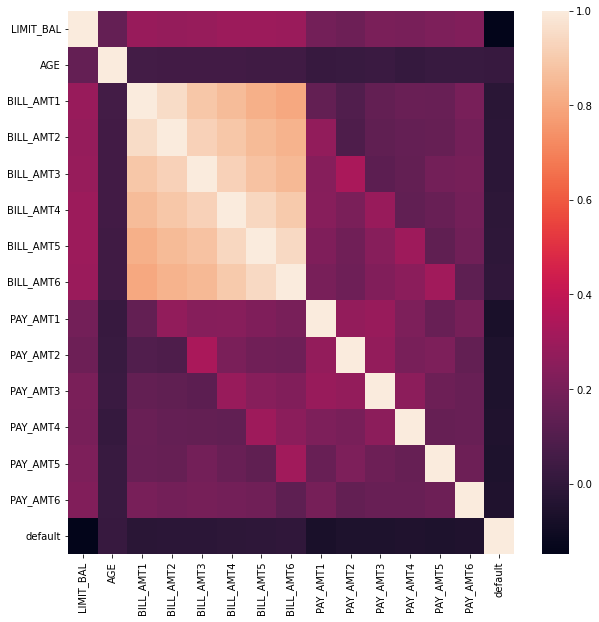

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_train[var_cont+["default"]].corr(), ax=ax)

In [ ]:
# XTrain_back = XTrain_transform.copy()
# XTrain_transform = XTrain_transform.drop(columns=["PAY_AMT{i}".format(i=x) for x in np.arange(2,7)])
# XTrain_transform = XTrain_transform.drop(columns=["PAY_{i}".format(i=x) for x in np.arange(1,7)])


# XTest_back = XTest_transform.copy()
# XTest_transform = XTest_transform.drop(columns=["PAY_AMT{i}".format(i=x) for x in np.arange(2,7)])
# XTest_transform = XTest_transform.drop(columns=["PAY_{i}".format(i=x) for x in np.arange(1,7)])

<AxesSubplot:>

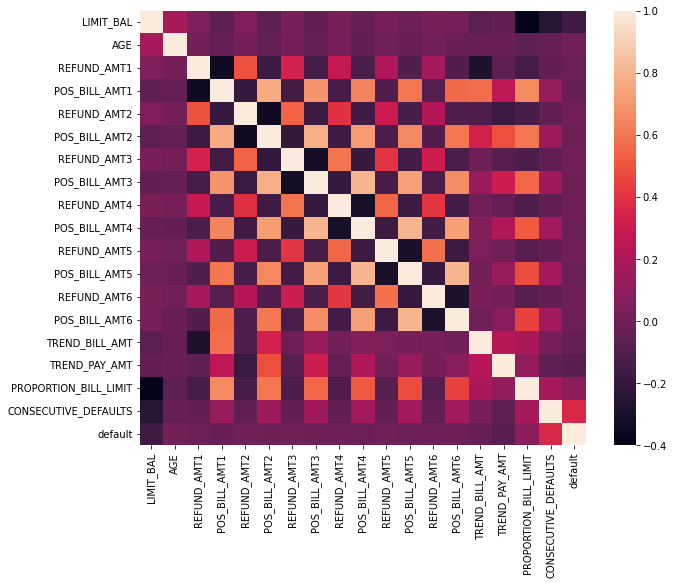

In [18]:
data_train = pd.concat([XTrain_transform,yTrain],axis=1)


var_cont = ['LIMIT_BAL', 'AGE', 'REFUND_AMT1','POS_BILL_AMT1','REFUND_AMT2', 'POS_BILL_AMT2',
            'REFUND_AMT3', 'POS_BILL_AMT3', 'REFUND_AMT4', 'POS_BILL_AMT4',
            'REFUND_AMT5', 'POS_BILL_AMT5', 'REFUND_AMT6', 'POS_BILL_AMT6', 'TREND_BILL_AMT', 'TREND_PAY_AMT',
            'PROPORTION_BILL_LIMIT', 'CONSECUTIVE_DEFAULTS']

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data_train[var_cont+["default"]].corr(), ax=ax)

## Rebalanceo

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=7, k_neighbors=3,sampling_strategy=0.35)
XTrain_rebalanced, yTrain_rebalanced = sm.fit_resample(XTrain_transform, yTrain)

In [ ]:
pd.DataFrame(yTrain).reset_index().groupby("default").count()

In [ ]:
pd.DataFrame(yTrain_rebalanced).reset_index().groupby("default").count()

## Seleccion de variables

In [19]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE

### Metodo filtrado

In [20]:
# mu_inf=mutual_info_regression(XTrain_transform, yTrain,discrete_features=True,n_neighbors=4)

# plt.plot(mu_inf,'p')
# plt.vlines(x=[15,30],ymin=0,ymax=np.max(mu_inf)+0.05,ls=':',colors='r')
# plt.axhline(y=0.05,ls=':',color='b')  #Threshold
# plt.ylabel('MI scores')

In [21]:
# select_var_filtrado = XTrain_transform.columns[mu_inf > 0]
# select_var_filtrado

# XTrain_transform_filtrado = XTrain_transform[select_var_filtrado]
# XTest_transform_filtrado = XTest_transform[select_var_filtrado]

### Metodos de envoltura

In [22]:
# from sklearn.ensemble import RandomForestClassifier
# estimator = RandomForestClassifier(random_state=0,max_depth = 2, n_estimators=200)  #se usa random Forest como el algoritmo predictivo
# selector = RFE(estimator, n_features_to_select=114, step=1) #Se define step=1, pero lo puede cambiar para que sea más rápido
# selector = selector.fit(XTrain_transform, yTrain) # esto puede tardar algunos minutos

# #selector.support_  #Conjunto de variables seleccionadas

# select_var_envoltura = XTrain_transform.columns[selector.support_]

# XTrain_transform_envoltura = XTrain_transform[select_var_envoltura] 
# XTest_transform_envoltura = XTest_transform[select_var_envoltura]

# MODELOS

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn import metrics


from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.svm import SVC

In [24]:
def error_clasificacion(XTrain,yTrain,XTest,yTest,modelo="LDA"):
    modelos = {"LDA":LinearDiscriminantAnalysis(),
                "QDA" : QuadraticDiscriminantAnalysis(),
                "NBC" : GaussianNB(),
                "RegLog": LogisticRegression(random_state=0,max_iter=10000)}
    
    model = modelos[modelo]
    
    
    
    # train - predict de los modelos
    model.fit(XTrain, yTrain)
    predict=model.predict(XTest)
    predict_prob=model.predict_proba(XTest)


    error=0
    for i in range(0,len(yTest)):
        if(yTest.iloc[i]!=predict[i]):
            error+=1/len(yTest)
    print('El error de clasificación para {modelo} en la muestra de test es:{s}'.format(modelo=modelo,s=error))
    
    print(confusion_matrix(y_true=yTest, y_pred=predict))
    accuracy=accuracy_score(y_true=yTest, y_pred=predict)
    print(accuracy)
    precisionRegLog= precision_score(y_true=yTest.values, y_pred=predict)
    print(precisionRegLog)
    
    # curva roc para Train
    fig, ax = plt.subplots(ncols=2, figsize=(16, 8))
    fpr, tpr, thresholds = roc_curve(yTrain, model.predict(XTrain))
    AUC_train=metrics.auc(fpr, tpr)
    ax[0].set_title('Curva ROC para el entrenamiento')
    ax[0].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_train)
    ax[0].legend(loc = 'lower right')
    ax[0].plot([0, 1], [0, 1],'r--')
    ax[0].axis(xmin=-0.01,xmax=1,ymin=0,ymax=1.05)
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_xlabel('False Positive Rate')

    # curva roc para Test
    fpr, tpr, thresholds = roc_curve(yTest, predict)
    AUC_test=metrics.auc(fpr, tpr)
    ax[1].set_title('Curva ROC para el conjunto de prueba')
    ax[1].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_test)
    ax[1].legend(loc = 'lower right')
    ax[1].plot([0, 1], [0, 1],'r--')
    ax[1].axis(xmin=-0.01,xmax=1,ymin=0,ymax=1.05)
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_xlabel('False Positive Rate')



    return AUC_train, AUC_test, error, model

In [25]:
def graficas_roc_test_train(Xtrain, yTrain, XTest, yTest, model, grafica=True):

    # Train
    prediccionMdl_Train = model.predict_proba(Xtrain)[:,1]
    fpr_train, tpr_train, thresholds = metrics.roc_curve(yTrain, prediccionMdl_Train, pos_label=1)
    AUC_train=metrics.auc(fpr_train, tpr_train)
    

    # TEST
    prediccionMdl_Test = model.predict_proba(XTest)[:,1]
    fpr_test, tpr_test, thresholds = metrics.roc_curve(yTest, prediccionMdl_Test, pos_label=1)
    AUC_test = metrics.auc(fpr_test, tpr_test)
    

    if grafica:

        fig, ax = plt.subplots(ncols=2, figsize=(16, 8))    
        # Train
        ax[0].set_title('Receiver Operating Characteristic')
        ax[0].plot(fpr_train, tpr_train, 'b', label = 'AUC = %0.2f' % AUC_train)
        ax[0].legend(loc = 'lower right')
        ax[0].plot([0, 1], [0, 1],'r--')
        ax[0].axis(xmin=-0.01,xmax=1,ymin=0,ymax=1.05)
        ax[0].set_ylabel('True Positive Rate')
        ax[0].set_xlabel('False Positive Rate')

        # Test
        ax[1].set_title('Receiver Operating Characteristic')
        ax[1].plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.2f' % AUC_test)
        ax[1].legend(loc = 'lower right')
        ax[1].plot([0, 1], [0, 1],'r--')
        ax[1].axis(xmin=-0.01,xmax=1,ymin=0,ymax=1.05)
        ax[1].set_ylabel('True Positive Rate')
        ax[1].set_xlabel('False Positive Rate')
        
    print("AUC Train: {}".format(AUC_train))
    print("AUC Test: {}".format(AUC_test))

    return AUC_train, AUC_test


def metricas_modelo(XTest, yTest, model):
    
    predict=model.predict(XTest)
    error=0
    for i in range(0,len(yTest)):
        if(yTest.iloc[i]!=predict[i]):
            error+=1/len(yTest)
    print('El error de clasificación para modelo en la muestra de test es:{s}'.format(s=error))
    
    print(confusion_matrix(y_true=yTest, y_pred=predict))
    accuracy = accuracy_score(y_true=yTest, y_pred=predict)
    print("accuracy : {}".format(accuracy))
    precision = precision_score(y_true=yTest.values, y_pred=predict)
    print("precision : {}".format(precision))

    return accuracy, precision, error

# Random Forest

In [ ]:
clfRF = RandomForestClassifier(random_state=0,max_depth = 4, n_estimators=200)
clfRF.fit(XTrain_transform, yTrain)

graficas_roc_test_train(XTrain_transform, yTrain, XTest_transform, yTest, clfRF)
metricas_modelo(XTest_transform, yTest, clfRF)

In [ ]:
clfRF = RandomForestClassifier(random_state=0,max_depth = 4, n_estimators=200)
clfRF.fit(XTrain_transform, yTrain)

graficas_roc_test_train(XTrain_transform, yTrain, XTest_transform, yTest, clfRF)
metricas_modelo(XTest_transform, yTest, clfRF)

In [ ]:
clfRF = RandomForestClassifier(random_state=0,max_depth = 10, n_estimators=500)
clfRF.fit(XTrain_transform, yTrain)

graficas_roc_test_train(XTrain_transform, yTrain, XTest_transform, yTest, clfRF)
metricas_modelo(XTest_transform, yTest, clfRF)

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")

ejeX = XTrain_transform.columns.values
ejeY = clfRF.feature_importances_

ax.bar(ejeX,ejeY, color='teal')
ax.set_xticklabels(ejeX, rotation = 90)

# Decission Tree

In [ ]:
clfTree = DecisionTreeClassifier(max_depth=5)
clfTree.fit(XTrain_transform, yTrain)


graficas_roc_test_train(XTrain_transform, yTrain, XTest_transform, yTest, clfTree)
metricas_modelo(XTest_transform, yTest, clfTree)

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")

ejeX = XTrain_transform.columns.values
ejeY = clfTree.feature_importances_

ax.bar(ejeX,ejeY, color='teal')
ax.set_xticklabels(ejeX, rotation = 90)

# Gradient Boosting

AUC Train: 0.792809988488526
AUC Test: 0.7897359913793103
El error de clasificación para modelo en la muestra de test es:0.18000000000000246
[[3544  168]
 [ 696  392]]
accuracy : 0.82
precision : 0.7


(0.82, 0.7, 0.18000000000000246)

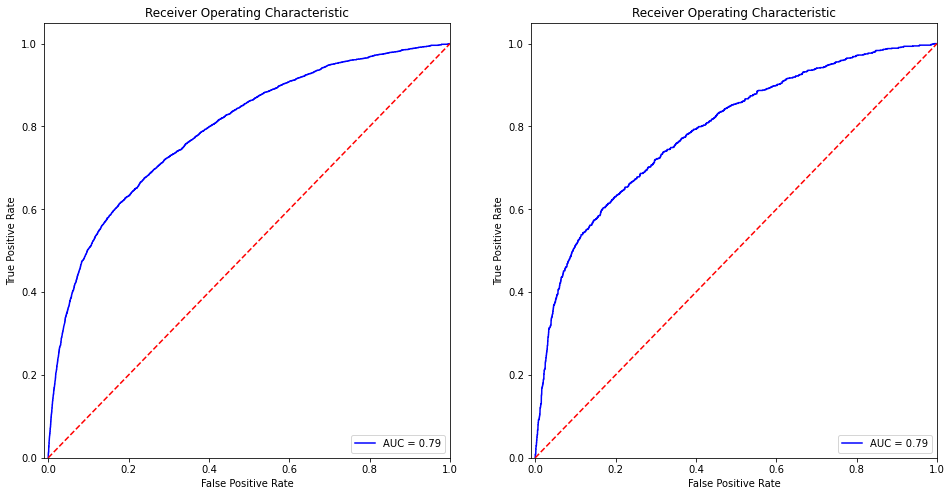

In [29]:
clfGB= GradientBoostingClassifier(learning_rate=0.05,max_depth=1,random_state=0,n_estimators=1000)
clfGB.fit(XTrain_transform, yTrain)

graficas_roc_test_train(XTrain_transform, yTrain, XTest_transform, yTest, clfGB)
metricas_modelo(XTest_transform, yTest, clfGB)

In [ ]:
clfGB= GradientBoostingClassifier(learning_rate=0.05,max_depth=1,random_state=0,n_estimators=1000, loss='exponential')
clfGB.fit(XTrain_transform, yTrain)

graficas_roc_test_train(XTrain_transform, yTrain, XTest_transform, yTest, clfGB)
metricas_modelo(XTest_transform, yTest, clfGB)

In [ ]:
clfGB= GradientBoostingClassifier(learning_rate=0.05,max_depth=1,random_state=0,n_estimators=1000, loss='exponential')
clfGB.fit(XTrain_transform, yTrain)

graficas_roc_test_train(XTrain_transform, yTrain, XTest_transform, yTest, clfGB)
metricas_modelo(XTest_transform, yTest, clfGB)

In [ ]:
from sklearn.decomposition import PCA

n = XTrain_transform[var_cont].shape[1]

acc_arr = []
AUC_train_arr = []
AUC_test_arr = []
precision_arr = []
error_clasifica_arr  = []

for i in np.arange(1,n,1):
    print(i)
    var_cont = ['LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                'REFUND_AMT1','POS_BILL_AMT1','REFUND_AMT2', 'POS_BILL_AMT2',
                'REFUND_AMT3', 'POS_BILL_AMT3', 'REFUND_AMT4', 'POS_BILL_AMT4',
                'REFUND_AMT5', 'POS_BILL_AMT5', 'REFUND_AMT6', 'POS_BILL_AMT6', 'TREND_BILL_AMT', 'TREND_PAY_AMT',
                'PROPORTION_BILL_LIMIT','DIFF_BILL_PAY_1', 'DIFF_BILL_PAY_2',
                'DIFF_BILL_PAY_3',
                'DIFF_BILL_PAY_4', 'DIFF_BILL_PAY_5',
                'PROPORTION_BILL_PAYED']

    
    #n = 20
    pca = PCA(n_components=i, random_state = 0)

    pca.fit(XTrain_transform[var_cont])
    XTrain_PCA = pca.transform(XTrain_transform[var_cont])
    XTest_PCA = pca.transform(XTest_transform[var_cont])


    cols_categ = [x for x in XTrain_transform.columns.values if x not in var_cont]

    XTrain_PCA = pd.concat([pd.DataFrame(XTrain_PCA, index=XTrain_transform.index),XTrain_transform[cols_categ]], axis=1)
    XTrain_PCA.columns = XTrain_PCA.columns.astype(str)
    XTest_PCA = pd.concat([pd.DataFrame(XTest_PCA, index=XTest_transform.index),XTest_transform[cols_categ]], axis=1)
    XTest_PCA.columns = XTest_PCA.columns.astype(str)

    clfGB= GradientBoostingClassifier(learning_rate=0.05,max_depth=1,random_state=0,n_estimators=1000, loss='exponential')
    clfGB.fit(XTrain_PCA, yTrain)

    AUC_train, AUC_test = graficas_roc_test_train(XTrain_PCA, yTrain, XTest_PCA, yTest, clfGB,grafica=False)
    accuracy, precision, error = metricas_modelo(XTest_PCA, yTest, clfGB)

    acc_arr.append(accuracy)
    AUC_train_arr.append(AUC_train)
    AUC_test_arr.append(AUC_test)
    precision_arr.append(precision)
    error_clasifica_arr.append(error)

In [ ]:
acc_arr = []
AUC_train_arr = []
AUC_test_arr = []
precision_arr = []
error_clasifica_arr  = []
n_estimators_arr = np.arange(1,5,1)

for n in n_estimators_arr:
    
    print(n)
    clfGB= GradientBoostingClassifier(learning_rate=0.05,max_depth=n,random_state=0,n_estimators=985, loss='exponential')
    clfGB.fit(XTrain_transform, yTrain)

    AUC_train, AUC_test = graficas_roc_test_train(XTrain_transform, yTrain, XTest_transform, yTest, clfGB,grafica=False)
    accuracy, precision, error = metricas_modelo(XTest_transform, yTest, clfGB)

    acc_arr.append(accuracy)
    AUC_train_arr.append(AUC_train)
    AUC_test_arr.append(AUC_test)
    precision_arr.append(precision)
    error_clasifica_arr.append(error)

In [ ]:
plt.title('Valores de AUC para distintos incios de arboles con los mismos datos')
plt.plot(np.arange(1,n,1), acc_arr, 'b',)
plt.ylabel('AUC')
plt.xlabel('n estimators')
plt.show()

In [ ]:
plt.title('Valores de AUC para distintos incios de arboles con los mismos datos')
plt.plot(np.arange(1,n,1), precision_arr, 'b',)
plt.ylabel('AUC')
plt.xlabel('n estimators')
plt.show()

In [ ]:
plt.title('Valores de AUC para distintos incios de arboles con los mismos datos')
plt.plot(np.arange(1,n,1), error_clasifica_arr, 'b',)
plt.ylabel('AUC')
plt.xlabel('n estimators')
plt.show()

In [ ]:
plt.title('Valores de AUC para distintos incios de arboles con los mismos datos')
plt.plot(np.arange(1,n,1), AUC_test_arr, 'b',)
plt.ylabel('AUC')
plt.xlabel('n estimators')
plt.show()

In [ ]:
plt.title('Valores de AUC para distintos incios de arboles con los mismos datos')
plt.plot(np.arange(1,n,1), AUC_train_arr, 'b',)
plt.ylabel('AUC')
plt.xlabel('n estimators')
plt.show()

### Iterando sobre seleccion de variables

In [ ]:
clfGB= GradientBoostingClassifier(learning_rate=0.05,max_depth=1,random_state=0,n_estimators=1000, loss='exponential')
clfGB.fit(XTrain_transform, yTrain)

graficas_roc_test_train(XTrain_transform, yTrain, XTest_transform, yTest, clfGB)
metricas_modelo(XTest_transform, yTest, clfGB)

In [ ]:
from sklearn.feature_selection import mutual_info_regression

mu_inf=mutual_info_regression(XTrain_transform, yTrain,discrete_features=True,n_neighbors=9)

plt.plot(mu_inf,'p')
plt.axhline(y=0.05,ls=':',color='b')  #Threshold
plt.ylabel('MI scores')

In [ ]:
acc_arr = []
AUC_train_arr = []
AUC_test_arr = []
precision_arr = []
error_clasifica_arr  = []
n_estimators_arr = len(mu_inf)-1

for i in np.arange(1,n_estimators_arr):
    print(i)
    
    c_val = (mu_inf <= np.sort(mu_inf)[i])

    clfGB= GradientBoostingClassifier(learning_rate=0.05,max_depth=1,random_state=0,n_estimators=1000, loss='exponential')
    clfGB.fit(XTrain_transform.loc[:,c_val], yTrain)

    AUC_train, AUC_test = graficas_roc_test_train(XTrain_transform.loc[:,c_val], yTrain, XTest_transform.loc[:,c_val], yTest, clfGB,grafica=False)
    accuracy, precision, error = metricas_modelo(XTest_transform.loc[:,c_val], yTest, clfGB)

    acc_arr.append(accuracy)
    AUC_train_arr.append(AUC_train)
    AUC_test_arr.append(AUC_test)
    precision_arr.append(precision)
    error_clasifica_arr.append(error)

In [ ]:
plt.title('Valores de AUC para distintos incios de arboles con los mismos datos')
plt.plot(np.arange(1,n_estimators_arr), acc_arr, 'b',)
plt.ylabel('AUC')
plt.xlabel('n estimators')
plt.show()

In [ ]:
plt.title('Valores de AUC para distintos incios de arboles con los mismos datos')
plt.plot(np.arange(1,n_estimators_arr), precision_arr, 'b',)
plt.ylabel('AUC')
plt.xlabel('n estimators')
plt.show()

In [ ]:
plt.title('Valores de AUC para distintos incios de arboles con los mismos datos')
plt.plot(np.arange(1,n_estimators_arr), error_clasifica_arr, 'b',)
plt.ylabel('AUC')
plt.xlabel('n estimators')
plt.show()

In [ ]:
plt.title('Valores de AUC para distintos incios de arboles con los mismos datos')
plt.plot(np.arange(1,n_estimators_arr), AUC_test_arr, 'b',)
plt.ylabel('AUC')
plt.xlabel('n estimators')
plt.show()

In [ ]:
plt.title('Valores de AUC para distintos incios de arboles con los mismos datos')
plt.plot(np.arange(1,n_estimators_arr), AUC_train_arr, 'b',)
plt.ylabel('AUC')
plt.xlabel('n estimators')
plt.show()

In [ ]:
np.argmax(acc_arr)

In [ ]:
c_val = (mu_inf <= np.sort(mu_inf)[116])

clfGB= GradientBoostingClassifier(learning_rate=0.05,max_depth=1,random_state=0,n_estimators=1000, loss='exponential')
clfGB.fit(XTrain_transform.loc[:,c_val], yTrain)

AUC_train, AUC_test = graficas_roc_test_train(XTrain_transform.loc[:,c_val], yTrain, XTest_transform.loc[:,c_val], yTest, clfGB,grafica=False)
accuracy, precision, error = metricas_modelo(XTest_transform.loc[:,c_val], yTest, clfGB)

In [ ]:
c_val = (mu_inf <= np.sort(mu_inf)[116])

clfGB= GradientBoostingClassifier(learning_rate=0.05,max_depth=1,random_state=0,n_estimators=1000, loss='exponential')
clfGB.fit(XTrain_transform, yTrain)

AUC_train, AUC_test = graficas_roc_test_train(XTrain_transform, yTrain, XTest_transform, yTest, clfGB,grafica=False)
accuracy, precision, error = metricas_modelo(XTest_transform, yTest, clfGB)

In [ ]:
clfGB.score(XTest_transform, yTest)

# Logistic GAM

In [ ]:
texto = ""
for i in np.arange(0,len(XTrain_transform.columns)):
    texto += "+ s({i})".format(i=i)

texto

In [ ]:
from pygam import LogisticGAM, s, f

gam = LogisticGAM(terms=s(0)+ s(1)+ s(2)+ s(3)+ s(4)+ s(5)+ s(6)+ s(7)+ s(8)+ s(9)+ s(10)+ s(11)+ s(12)+ s(13)+ s(14)+ s(15)+ s(16)+ s(17)+ s(18)+ s(19)+ s(20)+ s(21)+ s(22)+ s(23)+ s(24)+ s(25)+ s(26)+ s(27)+ s(28)+ s(29)+ s(30)+ s(31)+ s(32)+ s(33)+ s(34)+ s(35)+ s(36)+ s(37)+ s(38)).fit(XTrain_transform, yTrain)

In [ ]:
pred=gam.predict(X=XTest_transform)  #Predicción en test


fig, ax = plt.subplots(ncols=2, figsize=(16, 8))

# Train
prediccionGAM = gam.predict(X=XTrain_transform)
fpr, tpr, thresholds = metrics.roc_curve(yTrain, prediccionGAM, pos_label=1)
AUCRF=metrics.auc(fpr, tpr)
ax[0].set_title('Receiver Operating Characteristic')
ax[0].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRF)
ax[0].legend(loc = 'lower right')
ax[0].plot([0, 1], [0, 1],'r--')
ax[0].axis(xmin=-0.01,xmax=1,ymin=0,ymax=1.05)
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')

# TEST
prediccionGAM = gam.predict(X=XTest_transform)
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionGAM, pos_label=1)
AUCRF=metrics.auc(fpr, tpr)
ax[1].set_title('Receiver Operating Characteristic')
ax[1].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRF)
ax[1].legend(loc = 'lower right')
ax[1].plot([0, 1], [0, 1],'r--')
ax[1].axis(xmin=-0.01,xmax=1,ymin=0,ymax=1.05)
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')

## SVM

In [ ]:
#clf = SVC(kernel='poly',probability=True,degree=2)
clf = SVC(kernel='linear',probability=True)
clf.fit(XTrain_transform_filtrado, yTrain)

In [ ]:
graficas_roc_test_train(XTrain_transform_filtrado, yTrain, XTest_transform_filtrado, yTest, clf)
metricas_modelo( XTest_transform_filtrado, yTest, clf)

In [ ]:
clf = SVC(kernel='poly',probability=True,degree=2)
clf.fit(XTrain, yTrain)

In [34]:
from sklearn.feature_selection import mutual_info_regression

mu_inf=mutual_info_regression(XTrain_transform, yTrain,discrete_features=True,n_neighbors=9)


acc_arr = []
AUC_train_arr = []
AUC_test_arr = []
precision_arr = []
error_clasifica_arr  = []
n_estimators_arr = len(mu_inf)-1

for i in np.arange(1,n_estimators_arr):
    print(i)
    
    c_val = (mu_inf <= np.sort(mu_inf)[i])

    svcmdl= clf = SVC(kernel='linear',probability=True)
    svcmdl.fit(XTrain_transform.loc[:,c_val], yTrain)

    AUC_train, AUC_test = graficas_roc_test_train(XTrain_transform.loc[:,c_val], yTrain, XTest_transform.loc[:,c_val], yTest, svcmdl, grafica=False)
    accuracy, precision, error = metricas_modelo(XTest_transform.loc[:,c_val], yTest, svcmdl)

    acc_arr.append(accuracy)
    AUC_train_arr.append(AUC_train)
    AUC_test_arr.append(AUC_test)
    precision_arr.append(precision)
    error_clasifica_arr.append(error)

1


### Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

clf1 = GradientBoostingClassifier(learning_rate=0.05,max_depth=1,random_state=0,n_estimators=1000, loss='exponential')
clf2 = RandomForestClassifier(random_state=0,max_depth = 10, n_estimators=500)
voting_mdl = VotingClassifier(estimators=[('GBC', clf1), ('RNDF', clf2)], voting='soft')
voting_mdl = voting_mdl.fit(XTrain_transform, yTrain)



AUC_train, AUC_test = graficas_roc_test_train(XTrain_transform, yTrain, XTest_transform, yTest, voting_mdl)
accuracy, precision, error = metricas_modelo(XTest_transform, yTest, voting_mdl)

### Ensemble

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
estimators = [
    ("rf", make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=10))),
    ("svr", make_pipeline(StandardScaler(), LinearSVC())),
    ("neigh" , make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=5))),
    ("clfGB", make_pipeline(StandardScaler(),GradientBoostingClassifier(learning_rate=0.05,max_depth=1,random_state=0,n_estimators=1000, loss='exponential')))
]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(XTrain_transform, yTrain)

In [ ]:
AUC_train, AUC_test = graficas_roc_test_train(XTrain_transform, yTrain, XTest_transform, yTest, clf)
accuracy, precision, error = metricas_modelo(XTest_transform, yTest, clf)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
estimators = [
    ("rf", make_pipeline(RandomForestClassifier(random_state=0,max_depth = 10, n_estimators=500))),
    ("svr", make_pipeline(LinearSVC(random_state=0))),
    ("neigh" , make_pipeline(KNeighborsClassifier(n_neighbors=10))),
    ("clfGB", make_pipeline(GradientBoostingClassifier(learning_rate=0.05,max_depth=1,random_state=0,n_estimators=1000, loss='exponential')))
]
clf = StackingClassifier(estimators=estimators, final_estimator = LogisticRegression())
clf.fit(XTrain_transform, yTrain)

AUC_train, AUC_test = graficas_roc_test_train(XTrain_transform, yTrain, XTest_transform, yTest, clf)
accuracy, precision, error = metricas_modelo(XTest_transform, yTest, clf)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
estimators = [
    ("rf", make_pipeline(RandomForestClassifier(random_state=0,max_depth = 10, n_estimators=500))),
    ("svr", make_pipeline(LinearSVC(random_state=7846))),
    ("neigh" , make_pipeline(KNeighborsClassifier(n_neighbors=10, weights="distance"))),
    ("clfGB", make_pipeline(GradientBoostingClassifier(learning_rate=0.05,max_depth=1,random_state=0,n_estimators=1000, loss='exponential')))
]
clf = StackingClassifier(estimators=estimators, final_estimator = LogisticRegression())
clf.fit(XTrain_transform, yTrain)

AUC_train, AUC_test = graficas_roc_test_train(XTrain_transform, yTrain, XTest_transform, yTest, clf)
accuracy, precision, error = metricas_modelo(XTest_transform, yTest, clf)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class aplicaReduccionDimensiones(BaseEstimator, TransformerMixin):
    # initializer 
    def __init__(self, columns):
        # save the features list internally in the class
        self.columns = columns
        
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        # return the dataframe with the specified features
        return X.loc[:,self.columns]
    
    def fit_transform(self, X, y=None, **fit_params):
        return X.loc[:,self.columns]
    
tr = aplicaReduccionDimensiones(columns=(mu_inf <= np.sort(mu_inf)[116]))
tr.fit_transform(XTrain_transform)


class aplicaPCA(BaseEstimator, TransformerMixin):
     # initializer 
    def __init__(self, cols):
        # save the features list internally in the class
        self.cols = cols
        self.var_cont = cols
        self.pca = PCA(n_components=21, random_state = 0)
        
    def fit(self, X, y = None):
        
        self.pca.fit(X[self.var_cont])
        return self
    
    def transform(self, X, y = None):
        
        self.cols_categ = [x for x in X.columns.values if x not in self.var_cont]

        self.X_pca = self.pca.transform(X[self.var_cont])
        self.X_pca = pd.concat([pd.DataFrame(self.X_pca, index=X.index),X[self.cols_categ]], axis=1)
        self.X_pca.columns = self.X_pca.columns.astype(str)

        return self.X_pca
    
    def fit_transform(self, X, y=None, **fit_params):
        
        self.fit(X)
        #self.cols_categ = [x for x in X.columns.values if x not in self.var_cont]

        X_pca_ret = self.transform(X)
        #self.X_pca = pd.concat([pd.DataFrame(self.X_pca, index=X.index),X[self.cols_categ]], axis=1)
        #self.X_pca.columns = self.X_pca.columns.astype(str)
        
        return X_pca_ret

In [ ]:
print(len(var_cont))
print(len([x for x in XTrain_transform.columns.values if x not in var_cont]))

In [ ]:
var_cont = ['LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                'REFUND_AMT1','POS_BILL_AMT1','REFUND_AMT2', 'POS_BILL_AMT2',
                'REFUND_AMT3', 'POS_BILL_AMT3', 'REFUND_AMT4', 'POS_BILL_AMT4',
                'REFUND_AMT5', 'POS_BILL_AMT5', 'REFUND_AMT6', 'POS_BILL_AMT6', 'TREND_BILL_AMT', 'TREND_PAY_AMT',
                'PROPORTION_BILL_LIMIT','DIFF_BILL_PAY_1', 'DIFF_BILL_PAY_2',
                'DIFF_BILL_PAY_3',
                'DIFF_BILL_PAY_4', 'DIFF_BILL_PAY_5',
                'PROPORTION_BILL_PAYED']
aplicaPCA_f = aplicaPCA(var_cont)
(aplicaPCA_f.fit_transform(XTrain_transform)).shape
# aplicaPCA_f.fit(XTrain_transform)
# aplicaPCA_f.transform(XTrain_transform)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

var_cont = ['LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                'REFUND_AMT1','POS_BILL_AMT1','REFUND_AMT2', 'POS_BILL_AMT2',
                'REFUND_AMT3', 'POS_BILL_AMT3', 'REFUND_AMT4', 'POS_BILL_AMT4',
                'REFUND_AMT5', 'POS_BILL_AMT5', 'REFUND_AMT6', 'POS_BILL_AMT6', 'TREND_BILL_AMT', 'TREND_PAY_AMT',
                'PROPORTION_BILL_LIMIT','DIFF_BILL_PAY_1', 'DIFF_BILL_PAY_2',
                'DIFF_BILL_PAY_3',
                'DIFF_BILL_PAY_4', 'DIFF_BILL_PAY_5',
                'PROPORTION_BILL_PAYED']

estimators = [
    ("rf", make_pipeline(RandomForestClassifier(random_state=0,max_depth = 10, n_estimators=500))),
    ("svr", make_pipeline(LinearSVC(random_state=0))),
    ("neigh" , make_pipeline(KNeighborsClassifier(n_neighbors=10, weights="distance"))),
    ("clfGB", make_pipeline(GradientBoostingClassifier(learning_rate=0.05,max_depth=1,random_state=0,n_estimators=1000, loss='exponential'))),
    ("Reduccion", make_pipeline(aplicaReduccionDimensiones(columns=(mu_inf <= np.sort(mu_inf)[116])), GradientBoostingClassifier(learning_rate=0.05,max_depth=1,random_state=0,n_estimators=1000, loss='exponential'))),
    ("rf_PCA", make_pipeline(aplicaPCA(cols=var_cont),RandomForestClassifier(random_state=0,max_depth = 10, n_estimators=500))),
    ("svr_PCA", make_pipeline(aplicaPCA(cols=var_cont),LinearSVC(random_state=0))),
    ("neigh_PCA" , make_pipeline(aplicaPCA(cols=var_cont),KNeighborsClassifier(n_neighbors=10, weights="distance"))),
    ("clfGB_PCA", make_pipeline(aplicaPCA(cols=var_cont),GradientBoostingClassifier(learning_rate=0.05,max_depth=1,random_state=0,n_estimators=1000, loss='exponential')))
]
clf = StackingClassifier(estimators=estimators, final_estimator = LogisticRegression())
clf.fit(XTrain_transform, yTrain)

AUC_train, AUC_test = graficas_roc_test_train(XTrain_transform, yTrain, XTest_transform, yTest, clf)
accuracy, precision, error = metricas_modelo(XTest_transform, yTest, clf)

# Submission

In [ ]:
submission_df = pd.read_excel("data/Test.xlsx")
submission_df = submission_df.rename(columns={"default.payment.next.month":"default", "PAY_0":"PAY_1"})

Xsubmission = transform_x(submission_df)
col_dummies = ['MARRIAGE','EDUCATION','SEX'] + ["PAY_{i}".format(i=x) for x in np.arange(1,7)]
Xsubmission = pd.concat([Xsubmission,pd.DataFrame(encoder.transform(Xsubmission[col_dummies]).toarray(), columns = encoder.get_feature_names_out(), index = Xsubmission.index)], axis = 1)
#Xsubmission = Xsubmission.drop(columns=col_dummies)

var_cont = ['LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                'REFUND_AMT1','POS_BILL_AMT1','REFUND_AMT2', 'POS_BILL_AMT2',
                'REFUND_AMT3', 'POS_BILL_AMT3', 'REFUND_AMT4', 'POS_BILL_AMT4',
                'REFUND_AMT5', 'POS_BILL_AMT5', 'REFUND_AMT6', 'POS_BILL_AMT6', 'TREND_BILL_AMT', 'TREND_PAY_AMT',
                'PROPORTION_BILL_LIMIT','DIFF_BILL_PAY_1', 'DIFF_BILL_PAY_2',
                'DIFF_BILL_PAY_3',
                'DIFF_BILL_PAY_4', 'DIFF_BILL_PAY_5',
                'PROPORTION_BILL_PAYED']


c_val = (mu_inf <= np.sort(mu_inf)[116])


# Xsubmission_PCA = pca.transform(Xsubmission[var_cont])
# cols_categ = [x for x in Xsubmission.columns.values if x not in var_cont]
# Xsubmission_PCA = pd.concat([pd.DataFrame(Xsubmission_PCA, index=Xsubmission.index),Xsubmission[cols_categ]], axis=1)
# Xsubmission_PCA.columns = Xsubmission_PCA.columns.astype(str)

# col_dummies = ['MARRIAGE','EDUCATION','SEX'] + ["PAY_{i}".format(i=x) for x in np.arange(1,7)]
# Xsubmission = pd.concat([Xsubmission,pd.DataFrame(encoder.transform(Xsubmission[col_dummies]).toarray(), columns = encoder.get_feature_names_out(), index = Xsubmission.index)], axis = 1)




# prediccion_submission = clfGB.predict_proba(Xsubmission_PCA)[:,1]
prediccion_submission = clf.predict_proba(Xsubmission)[:,1]

In [ ]:
pd.DataFrame()
export_df = Xsubmission
export_df["Probability"] = prediccion_submission

export_df = export_df["Probability"].reset_index()
export_df.columns = ["Id","Probability"]
export_df["Id"] = export_df["Id"]+1

export_df.to_csv("data/submission.csv",index=False)